In [71]:
import pandas as pd
import os

# Ruta de la carpeta que contiene los archivos CSV
carpeta = r'F:\Electro Dunas'

# Diccionario para almacenar los DataFrames con nombres originales como claves
dataframes_dict = {}

# Recorre todos los archivos en la carpeta
for archivo in os.listdir(carpeta):
    # Verifica que el archivo sea un archivo CSV
    if archivo.endswith('.csv'):
        # Construye la ruta completa del archivo
        ruta_archivo = os.path.join(carpeta, archivo)
        
        # Lee el archivo CSV y lo agrega al diccionario
        df = pd.read_csv(ruta_archivo)
        dataframes_dict[archivo] = df

In [72]:
columnas_primer_df = set(dataframes_dict[list(dataframes_dict.keys())[0]].columns)
todas_las_columnas_coinciden = all(
    set(df.columns) == columnas_primer_df for df in dataframes_dict.values()
)

# Imprime el resultado
if todas_las_columnas_coinciden:
    print("Todas las DataFrames tienen las mismas columnas.")
else:
    print("Las columnas de las DataFrames no coinciden.")

Todas las DataFrames tienen las mismas columnas.


In [73]:
# Verifica que todas las observaciones en la columna de fechas tengan el mismo formato
formato_fecha = "%Y-%m-%d %H:%M:%S"
todas_las_fechas_coinciden = all(
    all(pd.to_datetime(df['Fecha'], format=formato_fecha, errors='coerce').notnull())
    for df in dataframes_dict.values()
)

# Imprime el resultado
if todas_las_fechas_coinciden:
    print("Todas las observaciones en la columna de fechas tienen el mismo formato.")
else:
    print("El formato de las fechas no coincide en todas las observaciones.")

Todas las observaciones en la columna de fechas tienen el mismo formato.


In [74]:
# Verifica la presencia de datos faltantes en cada variable de cada DataFrame
datos_faltantes = {}
for nombre, df in dataframes_dict.items():
    datos_faltantes[nombre] = df.isnull().sum()

# Imprime los resultados
for nombre, faltantes_por_variable in datos_faltantes.items():
    print(f"\nDatos faltantes en el DataFrame {nombre}:\n{faltantes_por_variable}")


Datos faltantes en el DataFrame DATOSCLIENTE1.csv:
Fecha              0
Active_energy      0
Reactive_energy    0
Voltaje_FA         0
Voltaje_FC         0
dtype: int64

Datos faltantes en el DataFrame DATOSCLIENTE10.csv:
Fecha              0
Active_energy      0
Reactive_energy    0
Voltaje_FA         0
Voltaje_FC         0
dtype: int64

Datos faltantes en el DataFrame DATOSCLIENTE11.csv:
Fecha              0
Active_energy      0
Reactive_energy    0
Voltaje_FA         0
Voltaje_FC         0
dtype: int64

Datos faltantes en el DataFrame DATOSCLIENTE12.csv:
Fecha              0
Active_energy      0
Reactive_energy    0
Voltaje_FA         0
Voltaje_FC         0
dtype: int64

Datos faltantes en el DataFrame DATOSCLIENTE13.csv:
Fecha              0
Active_energy      0
Reactive_energy    0
Voltaje_FA         0
Voltaje_FC         0
dtype: int64

Datos faltantes en el DataFrame DATOSCLIENTE14.csv:
Fecha              0
Active_energy      0
Reactive_energy    0
Voltaje_FA         0
Voltaje_F

In [75]:
# Definir una función para encontrar clientes con datos atípicos en alguna variable
def encontrar_clientes_atipicos(df, variable, umbral_iqr=1.5):
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3 - q1
    umbral_superior = q3 + umbral_iqr * iqr
    umbral_inferior = q1 - umbral_iqr * iqr
    clientes_atipicos = df[(df[variable] > umbral_superior) | (df[variable] < umbral_inferior)]
    return clientes_atipicos

# Verificar clientes atípicos para cada DataFrame y variable
for nombre, df in dataframes_dict.items():
    print(f"\nClientes atípicos en el DataFrame {nombre}:")
    for variable in df.columns:
        if variable != 'Fecha':  # Excluir la variable de fecha
            clientes_atipicos = encontrar_clientes_atipicos(df, variable)
            if not clientes_atipicos.empty:
                print(f"Variable: {variable}")
                print(clientes_atipicos)


Clientes atípicos en el DataFrame DATOSCLIENTE1.csv:
Variable: Active_energy
                     Fecha  Active_energy  Reactive_energy  Voltaje_FA  \
146    2021-01-07 02:00:00       0.063475         0.251438  466.620761   
148    2021-01-07 04:00:00       0.120975         0.129139  489.897416   
152    2021-01-07 08:00:00       0.064028         0.253971  469.346792   
158    2021-01-07 14:00:00       0.066474         0.061772  500.789647   
317    2021-01-14 05:00:00       0.010552         0.282523  490.395549   
...                    ...            ...              ...         ...   
19187  2023-03-11 11:00:00       0.151264         0.127300  486.687675   
19189  2023-03-11 13:00:00       0.069781         0.176579  459.946884   
19190  2023-03-11 14:00:00       0.067594         0.217458  418.308337   
19524  2023-03-25 12:00:00       0.071664         0.156832  503.919936   
19533  2023-03-25 21:00:00       0.048528         0.164825  489.716859   

       Voltaje_FC  
146    491.18

In [76]:
import pandas as pd

# Ruta del archivo CSV con las clasificaciones de sector económico
ruta_archivo_sector = 'F:/Electro Dunas/sector_economico_clientes.xlsx'

df_sector = pd.read_excel(ruta_archivo_sector)


In [77]:
df_sector

,Cliente:,Sector Económico:
0,Cliente 1,Elaboración de cacao y chocolate y de producto...
1,Cliente 2,Elaboración de cacao y chocolate y de producto...
2,Cliente 3,Elaboración de cacao y chocolate y de producto...
3,Cliente 4,Elaboración de cacao y chocolate y de producto...
4,Cliente 5,Elaboración de cacao y chocolate y de producto...
5,Cliente 6,Cultivo de Árboles Frutales y Nueces
6,Cliente 7,Cultivo de Árboles Frutales y Nueces
7,Cliente 8,Cultivo de Árboles Frutales y Nueces
8,Cliente 9,Cultivo de Árboles Frutales y Nueces
9,Cliente 10,Cultivo de Árboles Frutales y Nueces


In [78]:
for nombre_df, df in dataframes_dict.items():
    # Extraer el número de cliente del nombre del archivo (por ejemplo, 'DATOSCLIENTE1.csv' -> '1')
    numero_cliente = int(nombre_df.split('CLIENTE')[1].split('.')[0])
    
    # Añadir la columna de sector económico usando el número de cliente
    df['Sector'] = df_sector.loc[numero_cliente - 1, 'Sector Económico:']

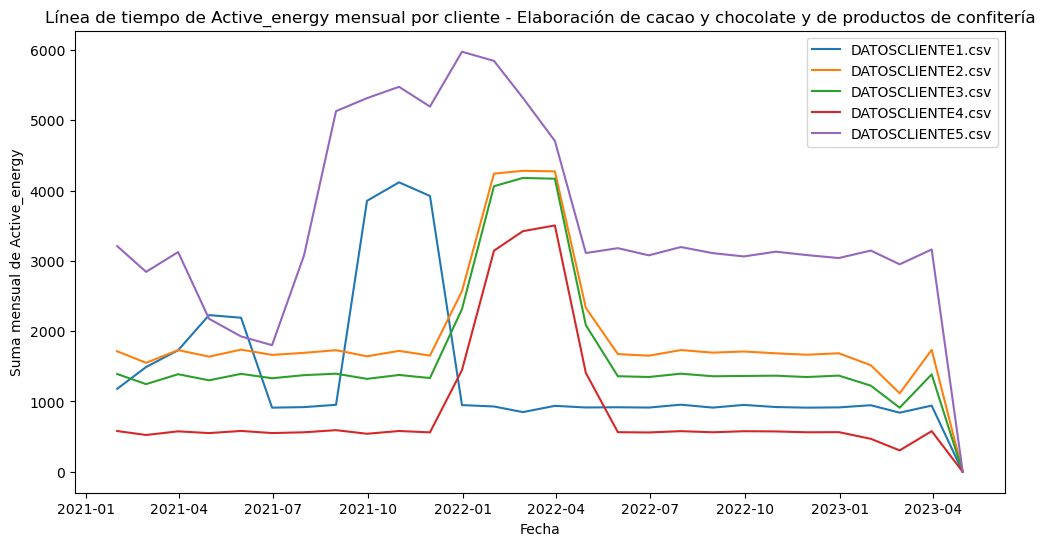

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Asumiendo que dataframes_dict es un diccionario de DataFrames que ya ha sido actualizado con la columna 'Sector'


# Sector de interés
sector_interes = 'Elaboración de cacao y chocolate y de productos de confitería'

# Filtrar DataFrames por el sector de interés
dataframes_sector_interes = {
    nombre: df[df['Sector'] == sector_interes] for nombre, df in dataframes_dict.items()
}

# Convertir la columna 'Fecha' a formato de fecha y establecerla como índice en cada DataFrame
for df in dataframes_sector_interes.values():
    df['Fecha'] = pd.to_datetime(df['Fecha'])
    df.set_index('Fecha', inplace=True)

# Graficar la línea de tiempo de la suma mensual de 'Active_energy' para cada cliente del primer sector
plt.figure(figsize=(12, 6))
plt.title(f'Línea de tiempo de Active_energy mensual por cliente - {sector_interes}')

for nombre, df in dataframes_sector_interes.items():
    df_mensual = df['Active_energy'].resample('M').sum()
    
    # Verificar si la suma mensual es diferente de cero antes de graficar y agregar leyenda
    if not df_mensual.empty and not df_mensual.sum() == 0:
        plt.plot(df_mensual.index, df_mensual.values, label=f'{nombre}')

plt.xlabel('Fecha')
plt.ylabel('Suma mensual de Active_energy')
plt.legend()
plt.show()


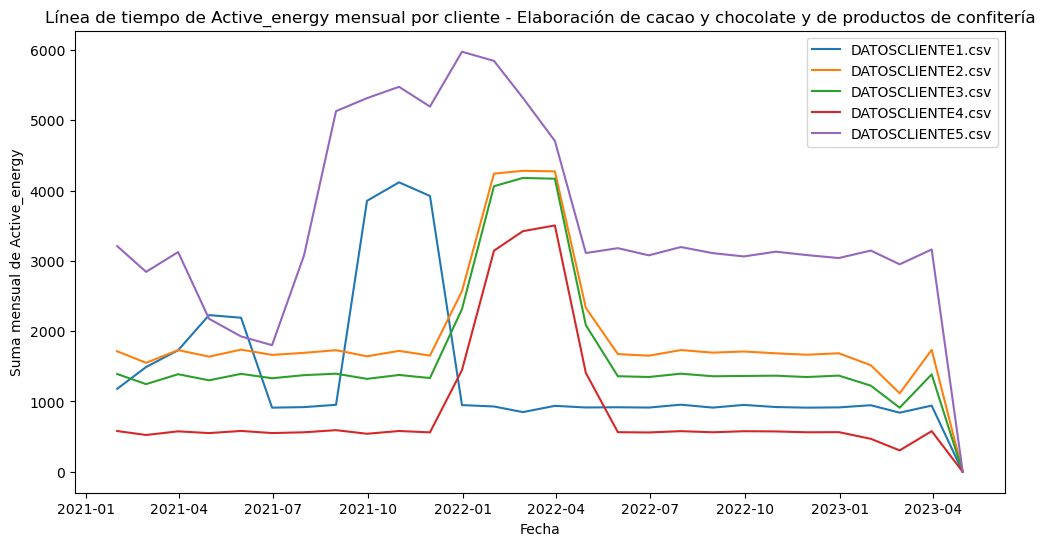

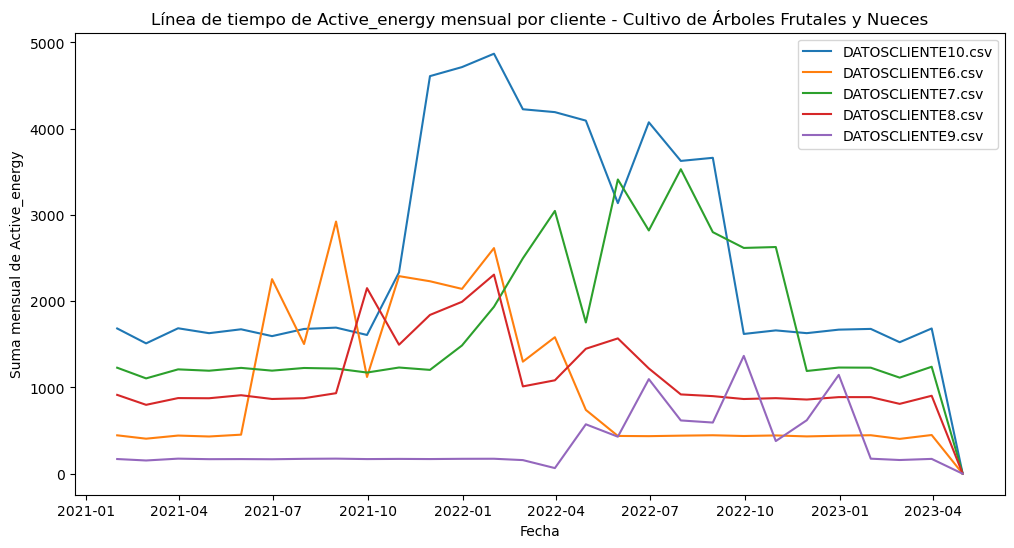

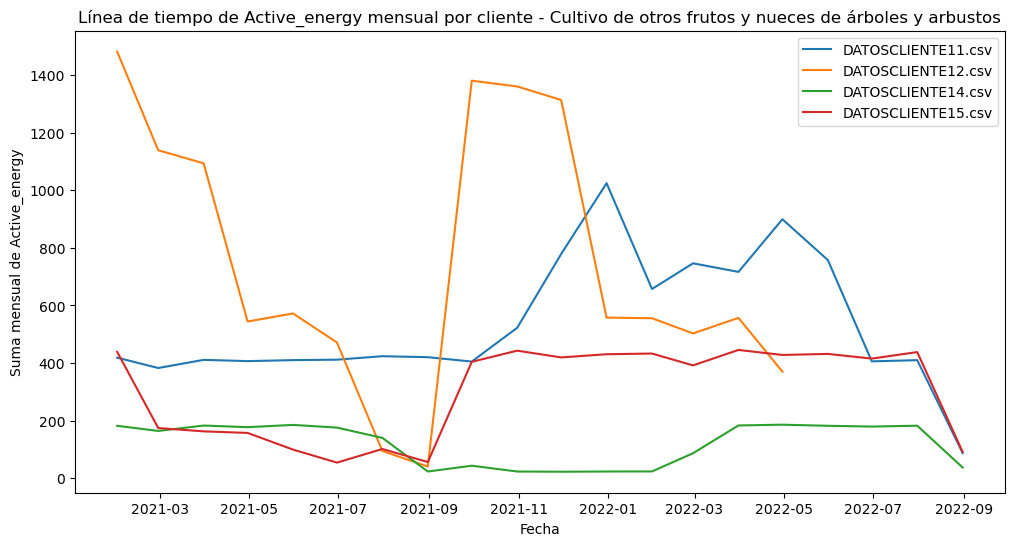

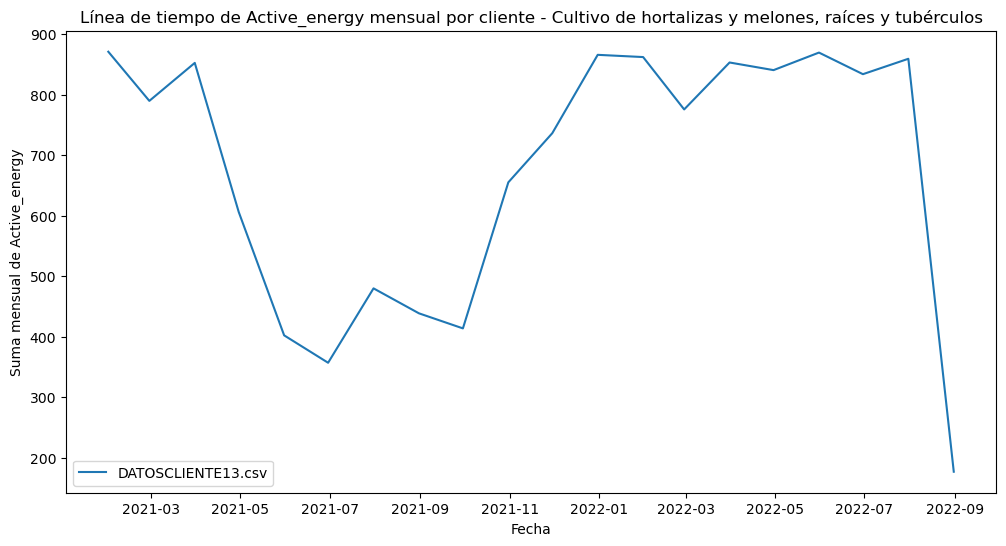

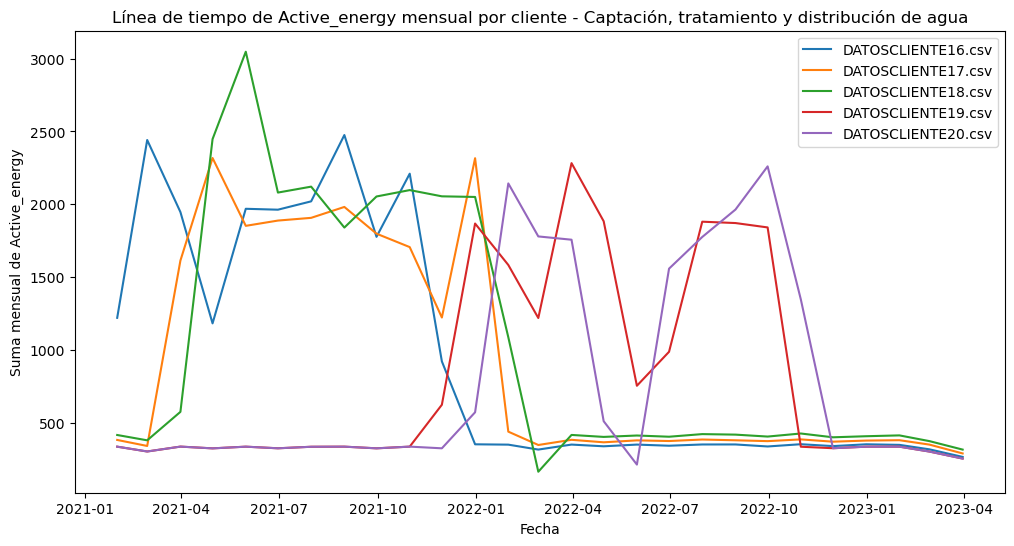

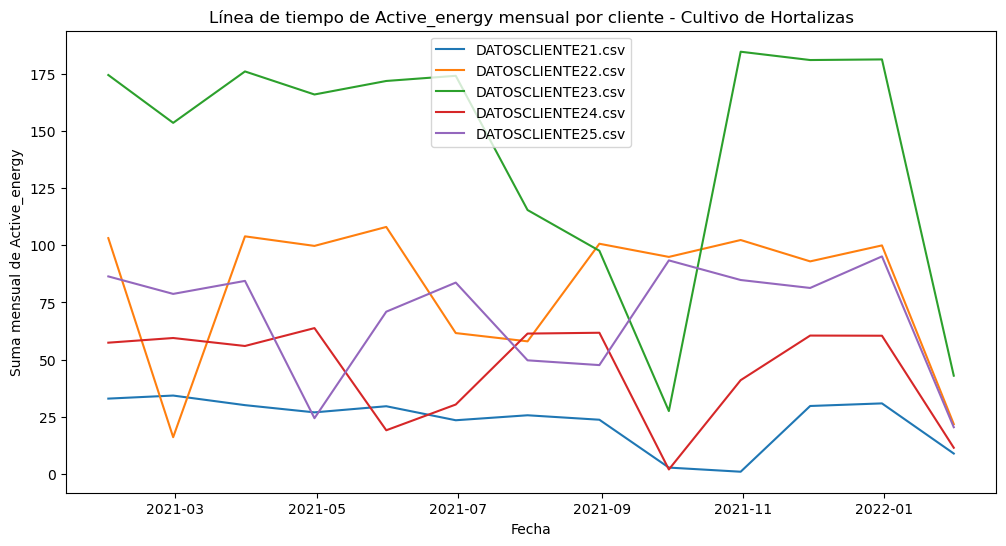

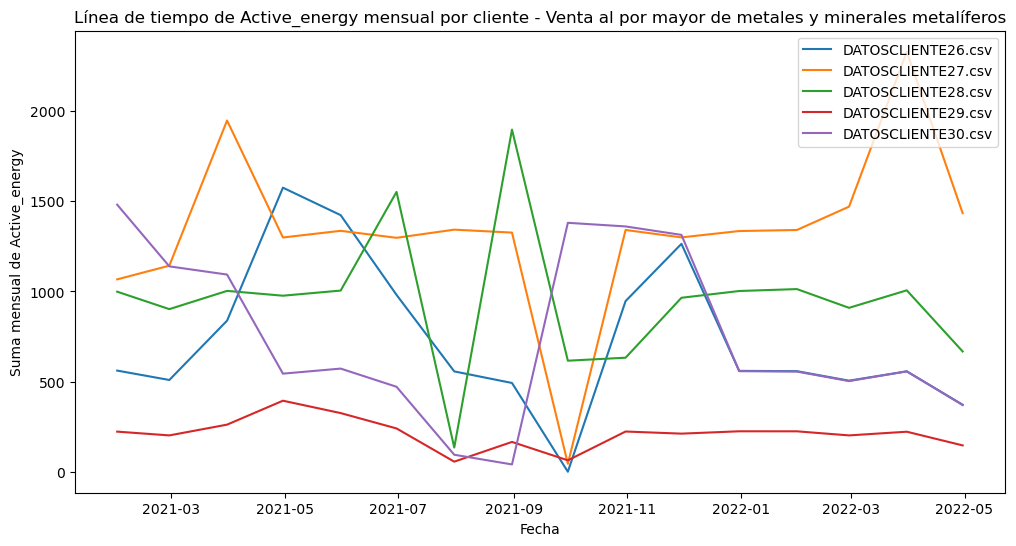

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Asumiendo que dataframes_dict es un diccionario de DataFrames que ya ha sido actualizado con la columna 'Sector'
# Puedes modificar esto según la estructura actual de tus DataFrames


# Obtener la lista de sectores únicos
sectores_unicos = pd.concat(dataframes_dict.values())['Sector'].unique()

# Convertir la columna 'Fecha' a formato de fecha y establecerla como índice en cada DataFrame
for df in dataframes_dict.values():
    df['Fecha'] = pd.to_datetime(df['Fecha'])
    df.set_index('Fecha', inplace=True)

# Graficar la línea de tiempo de la suma mensual de 'Active_energy' para cada cliente por sector
for sector_interes in sectores_unicos:
    # Filtrar DataFrames por el sector de interés
    dataframes_sector_interes = {
        nombre: df[df['Sector'] == sector_interes] for nombre, df in dataframes_dict.items()
    }

    # Crear un gráfico separado para cada sector
    plt.figure(figsize=(12, 6))
    plt.title(f'Línea de tiempo de Active_energy mensual por cliente - {sector_interes}')

    for nombre, df in dataframes_sector_interes.items():
        df_mensual = df['Active_energy'].resample('M').sum()

        # Verificar si la suma mensual es diferente de cero antes de graficar y agregar leyenda
        if not df_mensual.empty and not df_mensual.sum() == 0:
            plt.plot(df_mensual.index, df_mensual.values, label=f'{nombre}')

    plt.xlabel('Fecha')
    plt.ylabel('Suma mensual de Active_energy')
    plt.legend()
    plt.show()


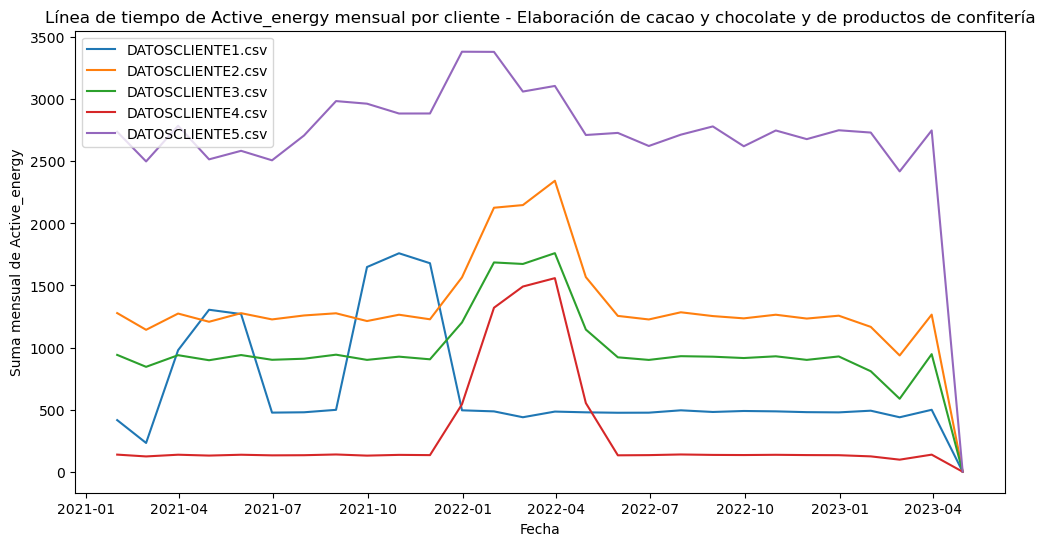

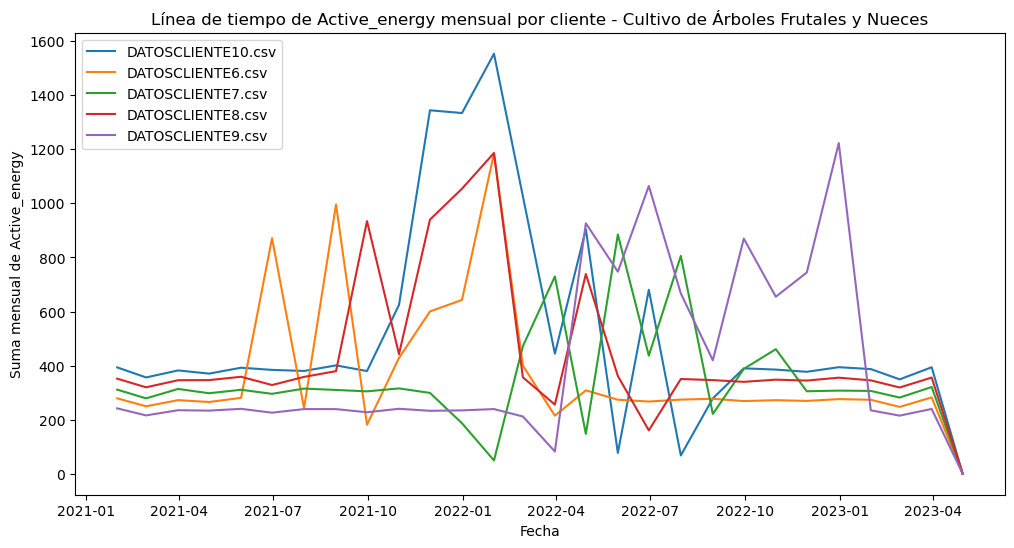

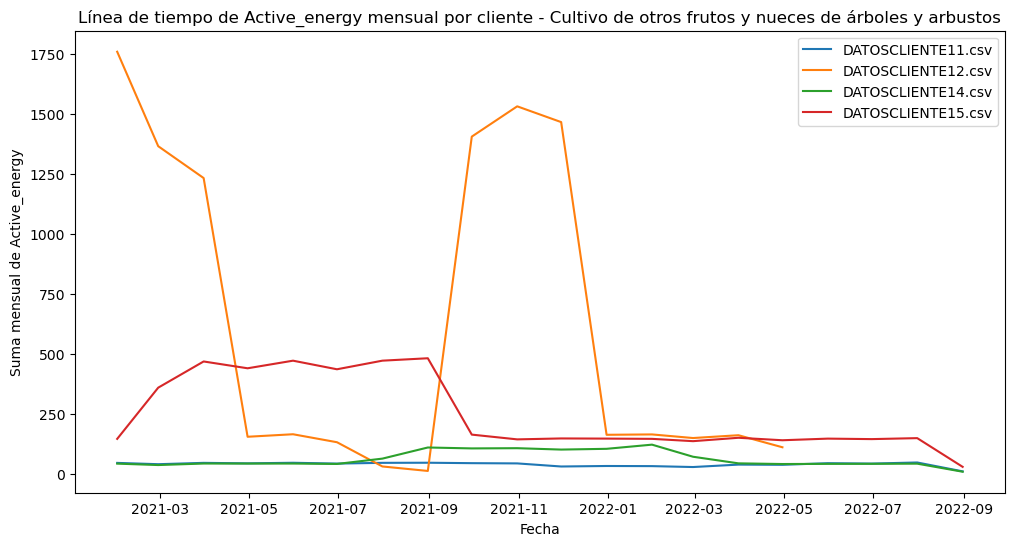

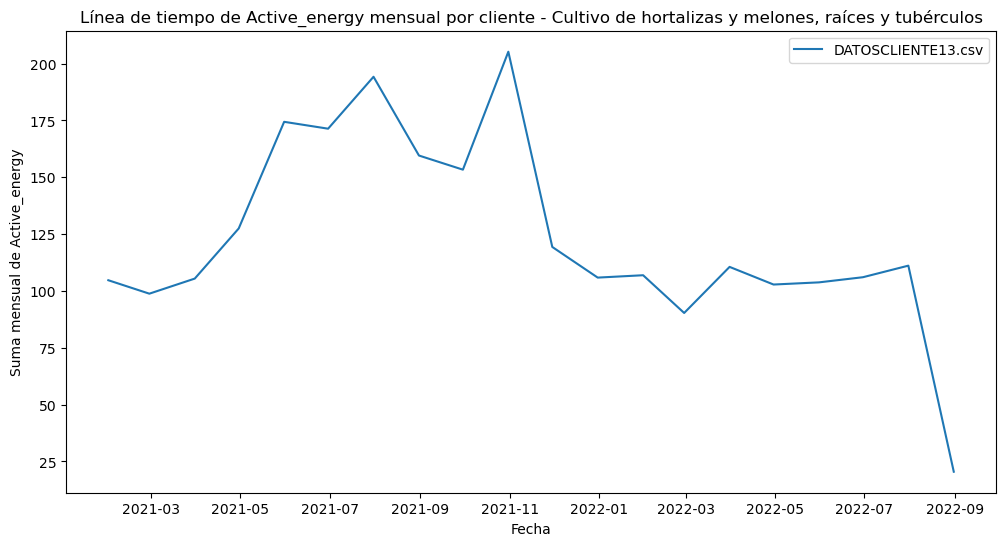

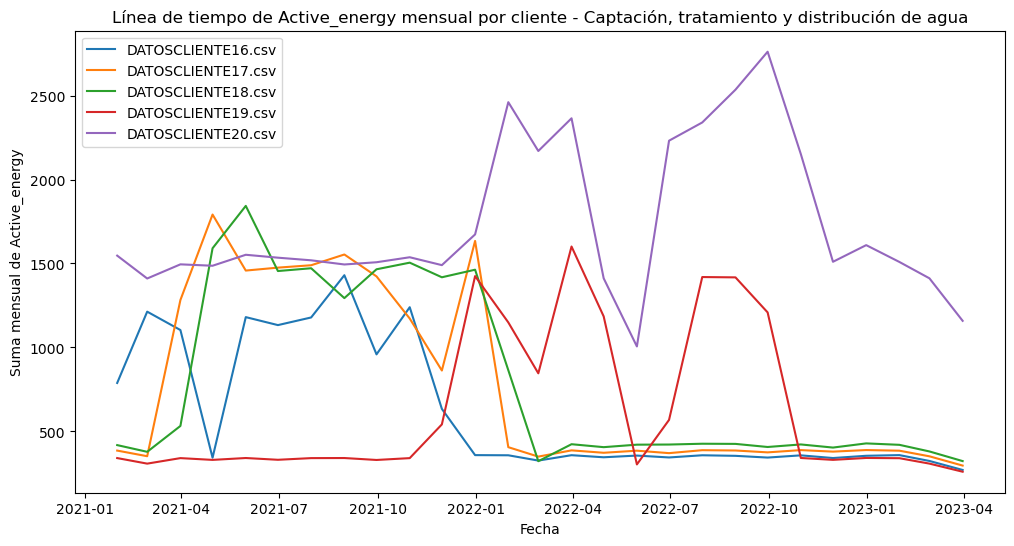

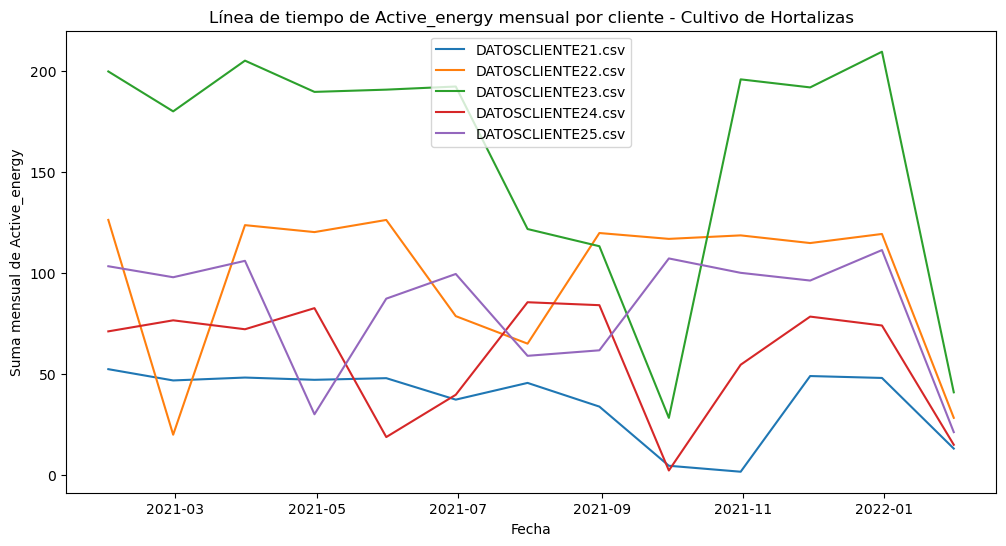

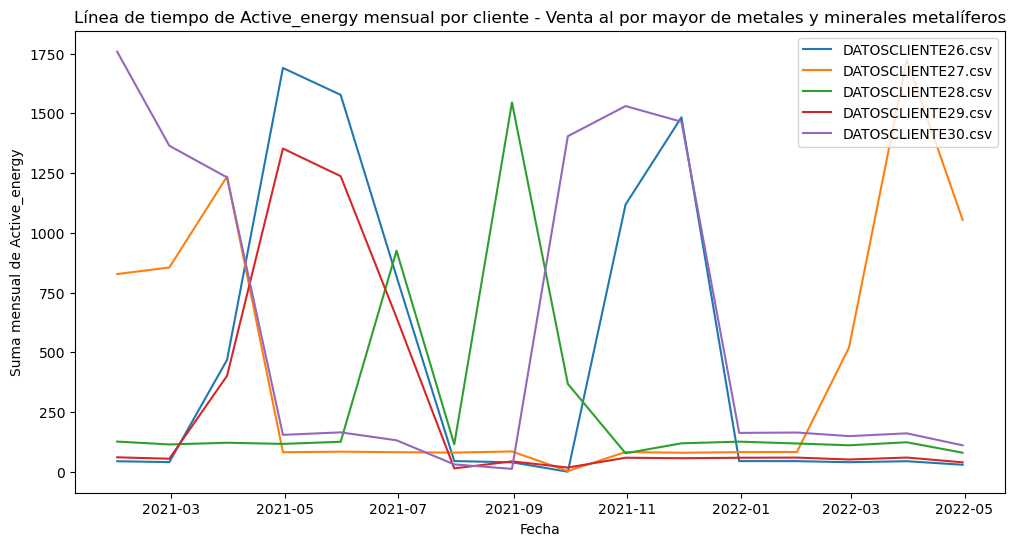

In [81]:
for sector_interes in sectores_unicos:
    # Filtrar DataFrames por el sector de interés
    dataframes_sector_interes = {
        nombre: df[df['Sector'] == sector_interes] for nombre, df in dataframes_dict.items()
    }

    # Crear un gráfico separado para cada sector
    plt.figure(figsize=(12, 6))
    plt.title(f'Línea de tiempo de Active_energy mensual por cliente - {sector_interes}')

    for nombre, df in dataframes_sector_interes.items():
        df_mensual = df['Reactive_energy'].resample('M').sum()

        # Verificar si la suma mensual es diferente de cero antes de graficar y agregar leyenda
        if not df_mensual.empty and not df_mensual.sum() == 0:
            plt.plot(df_mensual.index, df_mensual.values, label=f'{nombre}')

    plt.xlabel('Fecha')
    plt.ylabel('Suma mensual de Active_energy')
    plt.legend()
    plt.show()


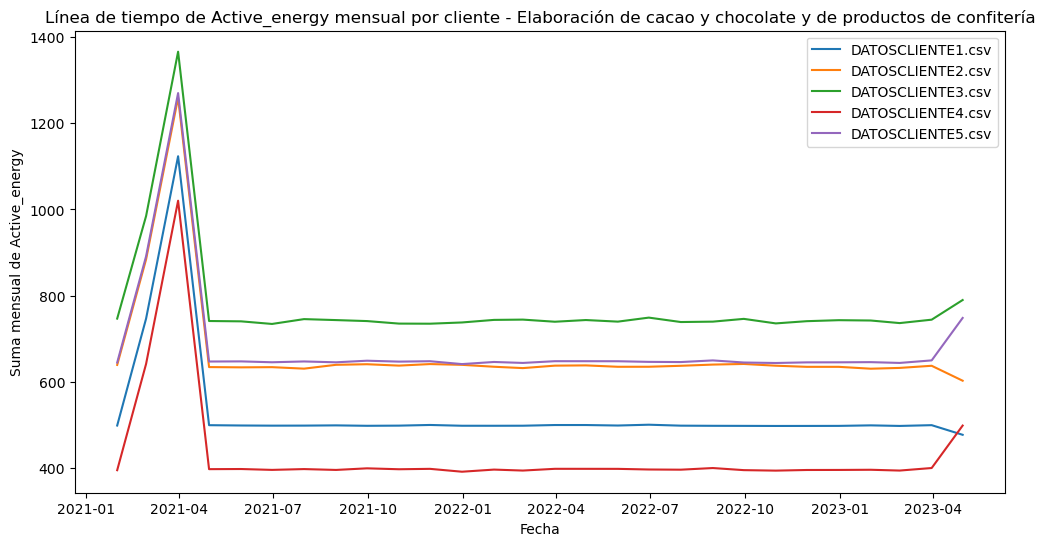

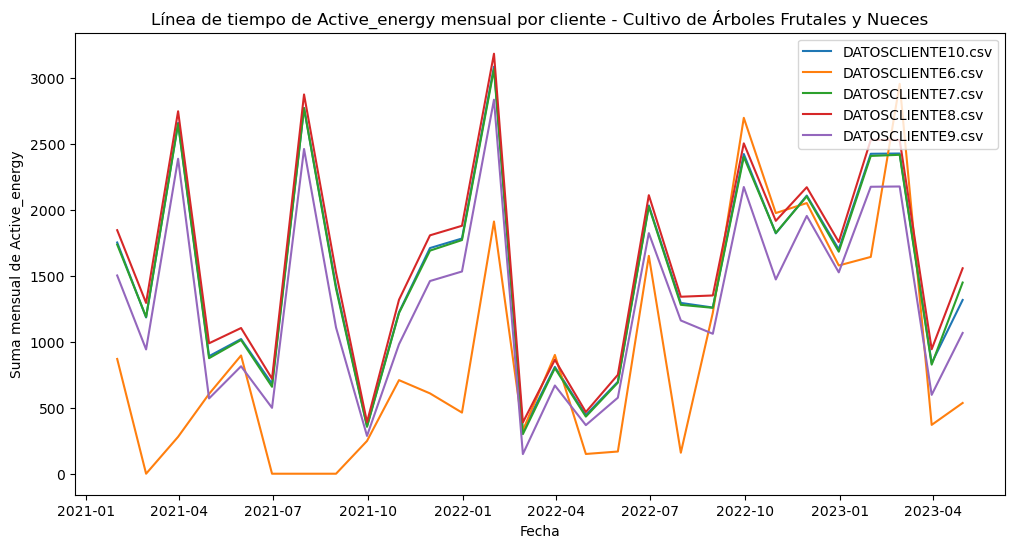

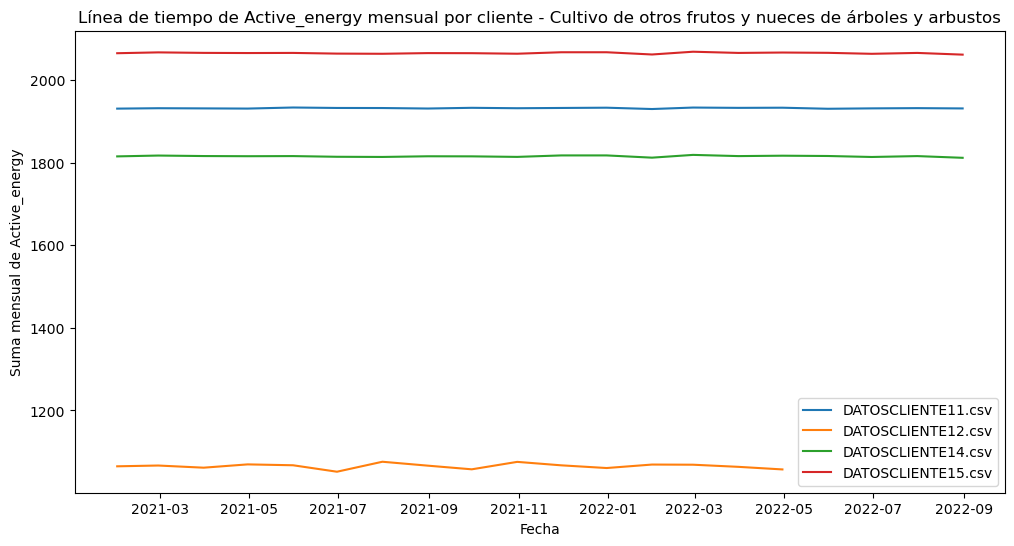

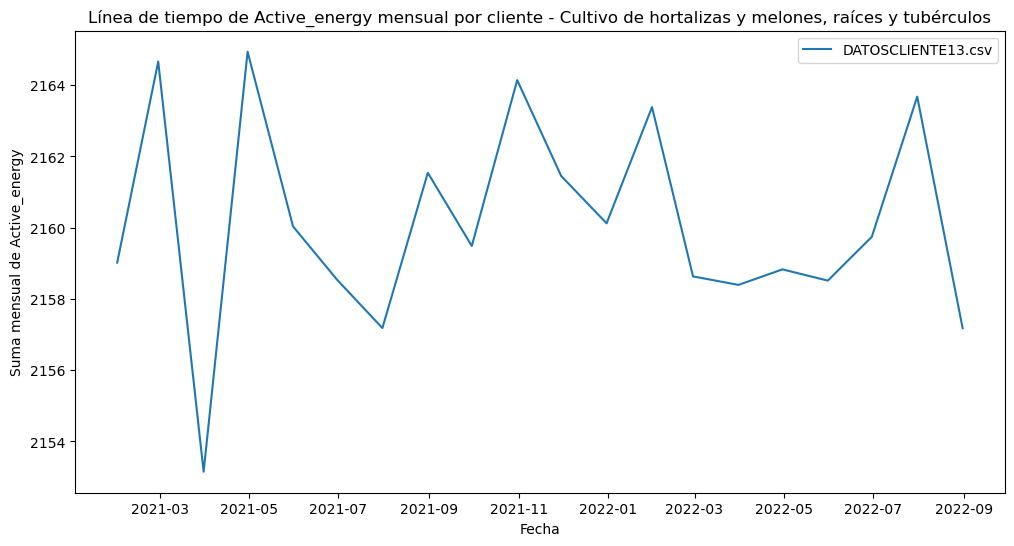

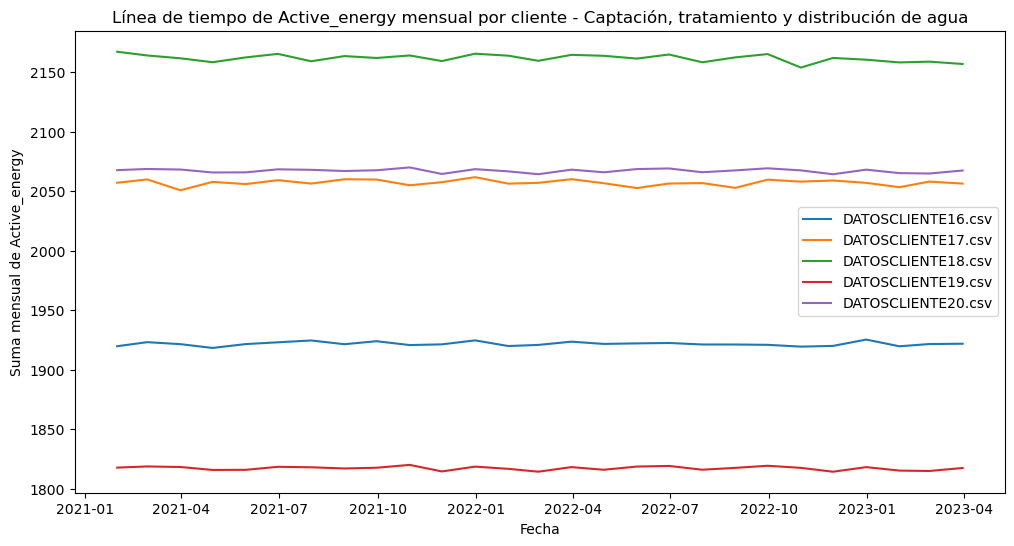

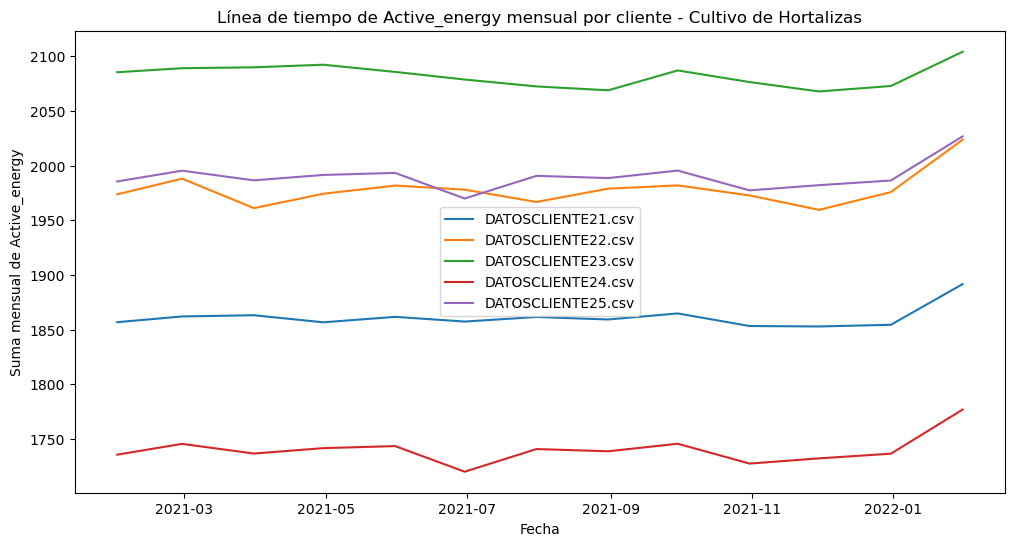

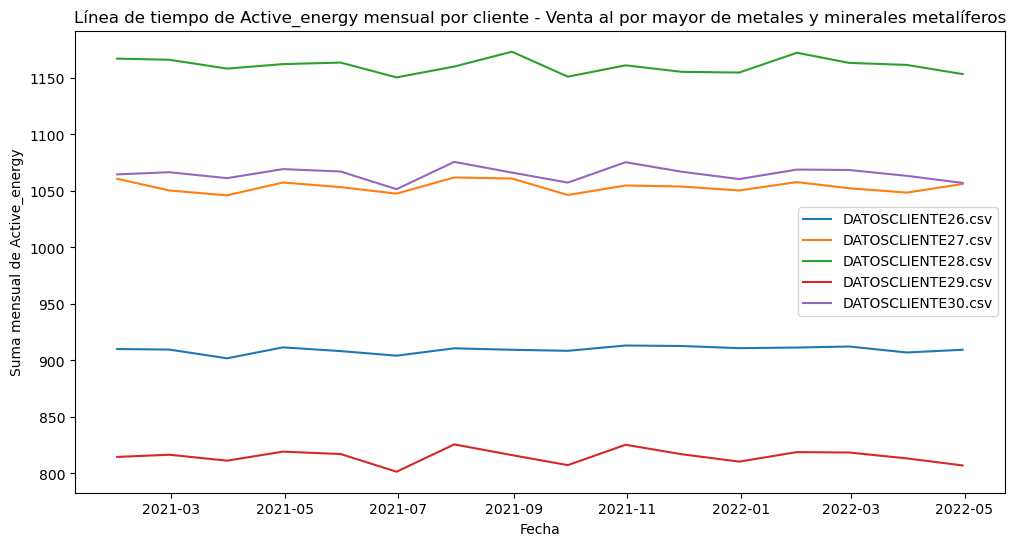

In [83]:
for sector_interes in sectores_unicos:
    # Filtrar DataFrames por el sector de interés
    dataframes_sector_interes = {
        nombre: df[df['Sector'] == sector_interes] for nombre, df in dataframes_dict.items()
    }

    # Crear un gráfico separado para cada sector
    plt.figure(figsize=(12, 6))
    plt.title(f'Línea de tiempo de Active_energy mensual por cliente - {sector_interes}')

    for nombre, df in dataframes_sector_interes.items():
        df_mensual = df['Voltaje_FA'].resample('M').mean()

        # Verificar si la suma mensual es diferente de cero antes de graficar y agregar leyenda
        if not df_mensual.empty and not df_mensual.sum() == 0:
            plt.plot(df_mensual.index, df_mensual.values, label=f'{nombre}')

    plt.xlabel('Fecha')
    plt.ylabel('Suma mensual de Active_energy')
    plt.legend()
    plt.show()
